In [1]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

from scipy.spatial import distance as dist

In [2]:
imagem = cv2.imread("images/px-woman-smilings.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

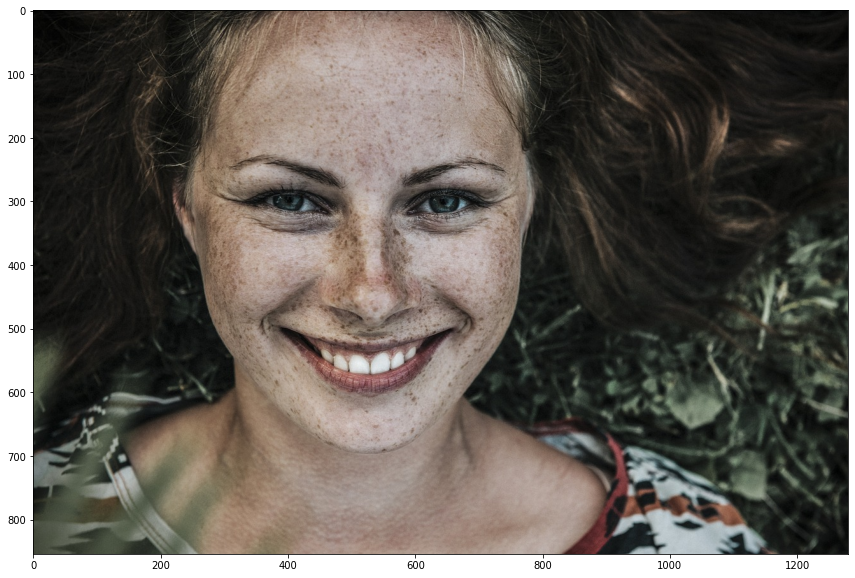

In [3]:
plt.figure(figsize=(20,10))
plt.imshow(imagem)

In [4]:
classificador_dlib_68_path = "classifiers/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()

In [5]:
def anotar_rosto(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for k, d in enumerate(retangulos):
        print('Identificado rosto ' + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255,255,0), 2)
        
    return imagem

In [6]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_rosto(imagem_anotada)

Identificado rosto 0


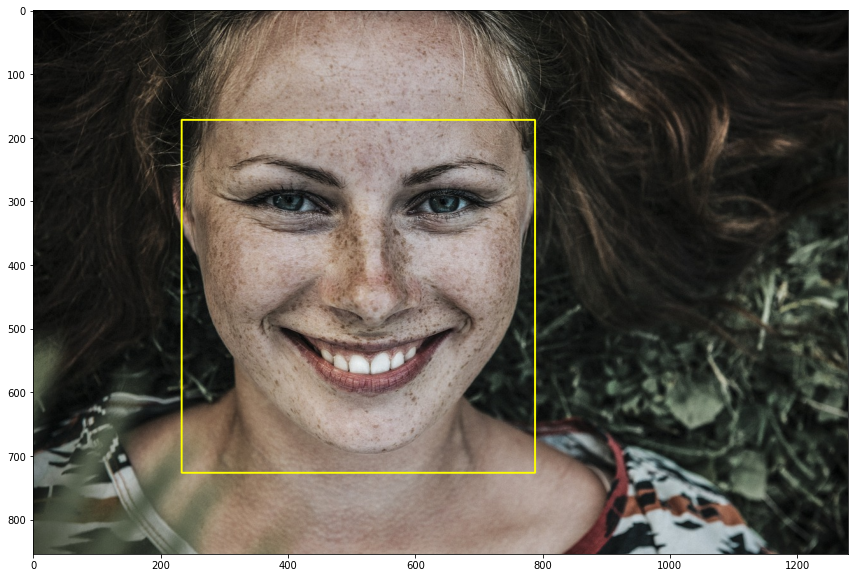

In [7]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [8]:
def pontos_marcos_faciais(imagem):
    
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    marcos = []
    
    for ret in retangulos:
        marcos.append(np.matrix([[p.x ,p.y] for p in classificador_dlib(imagem, ret).parts()]))
        
        return marcos

In [9]:
marcos_faciais = pontos_marcos_faciais(imagem)

In [10]:
len(marcos_faciais)

1

In [11]:
len(marcos_faciais[0])

68

In [12]:
def anotar_marcos_faciais(imagem,marcos):
    
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0,0], ponto[0,1])
            cv2.circle(imagem, centro, 3, (255,255,0), -1)
            cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
            #cv2.putText(imagem, "", centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
            
    return imagem

In [13]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

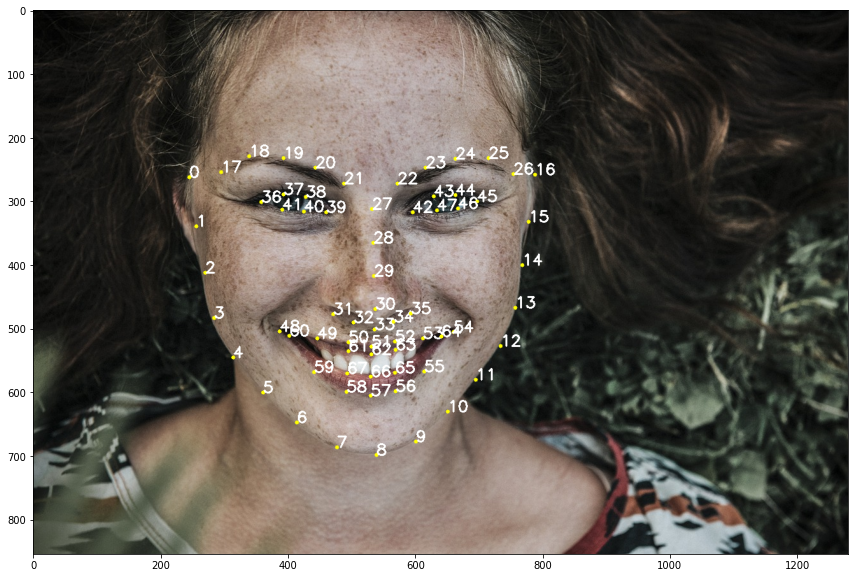

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [15]:
imagem_pessoa = cv2.imread("images/px-man-happy.jpg")
imagem_pessoa = cv2.cvtColor(imagem_pessoa, cv2.COLOR_BGR2RGB)

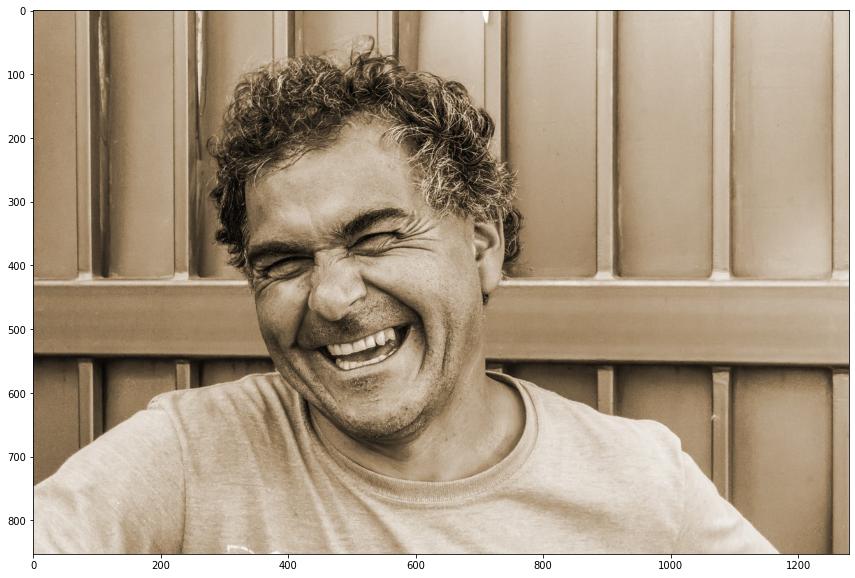

In [16]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_pessoa)

In [17]:
imagem_anotada = imagem_pessoa.copy()
marcos_faciais = pontos_marcos_faciais(imagem_anotada)
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

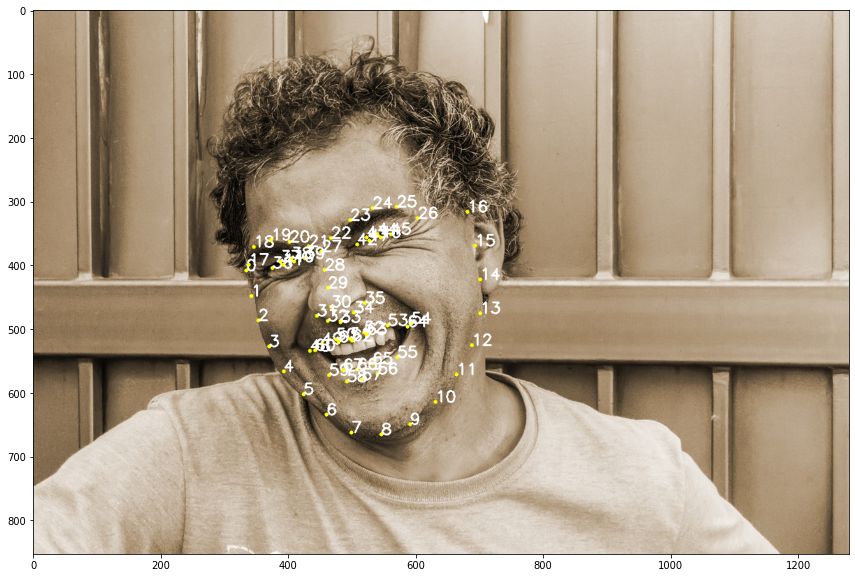

In [18]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [19]:
FACE = list(range(17, 68))
FACE_COMPLETA = list(range(0, 68))
LABIO = list(range(48, 61))
SOMBRANCELHA_DIRETA = list(range(17, 22))
SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36,42))
OLHO_ESQUERDO = list(range(42,48))
NARIZ = list(range(27,35))
MANDIBULA = list(range(0,17))

In [20]:
def aspecto_razao_olhos(pontos_olhos):
    
    a = dist.euclidean(pontos_olhos[1], pontos_olhos[5])
    b = dist.euclidean(pontos_olhos[2], pontos_olhos[4])
    c = dist.euclidean(pontos_olhos[0], pontos_olhos[3])
    
    aspecto_razao = (a + b)/(2.0 * c)
    
    return aspecto_razao

In [21]:
def anotar_marcos_casca_convexa(imagem, marcos):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for idx, ret in enumerate(retangulos):
        marco = marcos[idx]
        
        pontos = cv2.convexHull(marco[OLHO_ESQUERDO])
        cv2.drawContours(imagem, [pontos], 0, (0,255,0), 2)
        
        pontos = cv2.convexHull(marco[OLHO_DIREITO])
        cv2.drawContours(imagem, [pontos], 0, (0,255,0), 2)
    
    return imagem


In [22]:
imagem_anotada = imagem_pessoa.copy()
imagem_anotada = anotar_marcos_casca_convexa(imagem_anotada, marcos_faciais)

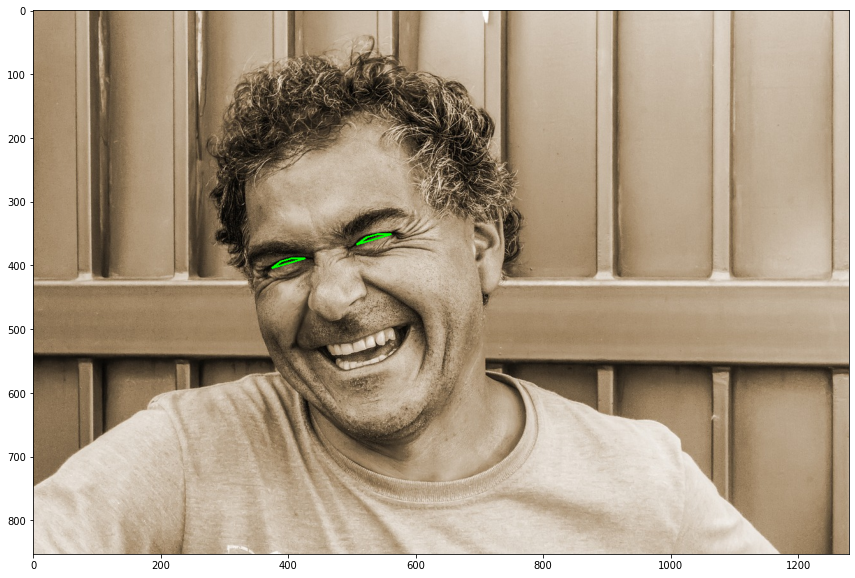

In [23]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [24]:
valor_olho_esquerdo = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
valor_olho_esquerdo

0.12169073046467273

In [25]:
valor_olho_direito = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])
valor_olho_direito

0.12044973520917499

In [26]:
imagem_pessoa_seria = cv2.imread("images/px-man-serious.jpg")
imagem_pessoa_seria = cv2.cvtColor(imagem_pessoa_seria, cv2.COLOR_BGR2RGB)

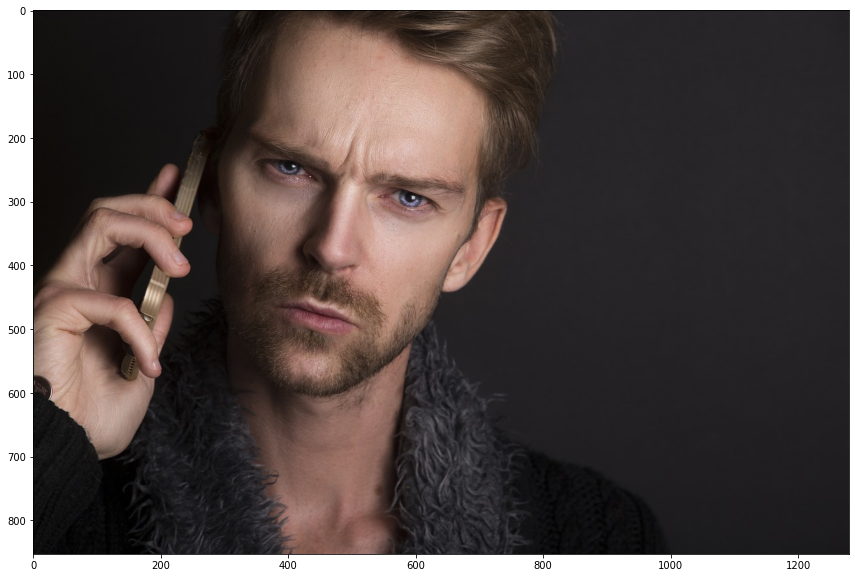

In [27]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_pessoa_seria)

In [28]:
imagem_anotada = imagem_pessoa_seria.copy()
marcos_faciais = pontos_marcos_faciais(imagem_anotada)
imagem_anotada = anotar_marcos_casca_convexa(imagem_anotada, marcos_faciais)

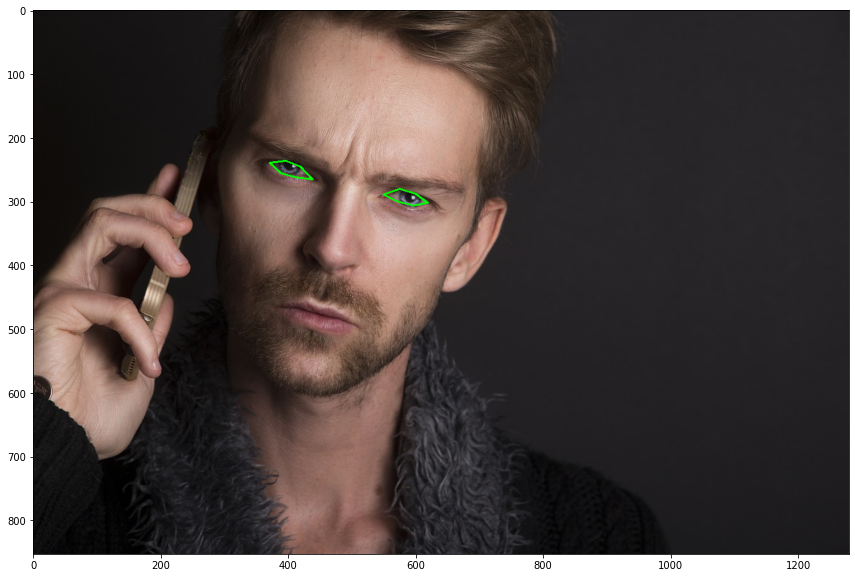

In [29]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [30]:
valor_olho_esquerdo = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
valor_olho_esquerdo

0.2715204726310253

In [31]:
valor_olho_direito = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])
valor_olho_direito

0.27133313866169434

# DLib

In [1]:
import cv2
import dlib
import numpy as np

def padronizar_imagem(imagem):
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem = cv2.resize(imagem, (400,300))
    return imagem

In [2]:
def pontos_marcos_faciais(imagem):
    retangulos = detector_face(imagem, 1)

    if len(retangulos) == 0:
        return None

    marcos = []

    for retangulo in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem, retangulo).parts()]))

    return marcos

In [3]:
def anotar_marcos_faciais(imagem, marcos_faciais):
    if imagem is None:
        return im

    for marco in marcos_faciais:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0, 0], ponto[0, 1])
            cv2.circle(imagem, centro, 3, color=(255, 255, 0), thickness=-1)
    return imagem

In [4]:
captura_video = cv2.VideoCapture(0)

classificador_dlib_68_pontos = "classifiers/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_pontos)
detector_face = dlib.get_frontal_face_detector()

while(True):
    ret, frame = captura_video.read()
    
    # Operations on the frame
    frame = padronizar_imagem(frame)
    pontos = pontos_marcos_faciais(frame)
    frame = anotar_marcos_faciais(frame, pontos)
    
    
    # Mostra o frame
    cv2.imshow('frame', bgr)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

captura_video.release()
cv2.destroyAllWindows()
        

RuntimeError: Unable to open classificadores/shape_predictor_68_face_landmarks.dat

In [34]:
captura_video.release()